In [6]:
import sys
# 设置编码utf-8，并保持stdin，stdout，stderr正常输出。
stdi, stdo, stde = sys.stdin, sys.stdout, sys.stderr
sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde


In [7]:
import jieba, numpy, pandas, sklearn, gensim, wordcloud, matplotlib, logging

In [8]:
import pandas as pd

#读入数据集
data = pd.read_excel(r'all_5.xlsx')
data.head()

,Unnamed: 0,评论者主页,评论者昵称,评论者性别,评论者所在地,评论者微博数,评论者关注数,评论者粉丝数,评论内容,评论获赞数,评论发布时间,情感取向,清洗,情感纠正
0,0,https://weibo.cn//u/1416662950,celebry,女,北京,887,251,169,春节假期放到正月十五吧，正好过了疫情高发的14天，有病的发病，没病的过了观察期，这样大家都安...,427,43856.27083,1,春节假期放到正月十五吧，正好过了疫情高发的14天，有病的发病，没病的过了观察期，这样大家都安...,NaN
1,1,https://weibo.cn//u/6246945039,juicypeach6666,女,北京,919,107,155,请求北京封城吧！,248,43856.26736,-1,请求北京封城吧！,NaN
2,2,https://weibo.cn//u/3820579475,女飞侠吖,女,重庆,346,373,314,上班推迟吧，好多人即将上班。这样人员流动性更大。,219,43856.26389,1,上班推迟吧，好多人即将上班。这样人员流动性更大。,NaN
3,3,https://weibo.cn//u/6623811698,庄周de鲲,女,其他,129,94,370,回复@ParkYaelim:会哒,0,43857.90278,1,会哒,NaN
4,4,https://weibo.cn//u/5305212453,一梦二三十,男,河南,80,129,14,为什么驻马店市上蔡县政府让明天所有单位公职人员上班，没有口罩，没有任何防护措施，不怕疫情传播...,1,43857.84236,-1,为什么驻马店市上蔡县政府让明天所有单位公职人员上班，没有口罩，没有任何防护措施，不怕疫情传播...,NaN


In [9]:
#%pip install wordcloud
#%conda  install xlrd

In [10]:
# 不同类别数据记录的统计
data['情感取向'].value_counts()

-1    3334
 1    1505
Name: 情感取向, dtype: int64

In [11]:
# 导入中文分词库jieba
import jieba
import numpy as np

In [12]:
# 对数据集的每个样本的文本进行中文分词

cutted = []
for row in data.values:
    try:
        raw_words = (" ".join(jieba.cut(row[12])))
        cutted.append(raw_words)
    except AttributeError:
        print(row[0])

cutted_array = np.array(cutted)

# 生成新数据文件，Comment字段为分词后的内容
data_cutted = pd.DataFrame({
    'Comment': cutted_array,
    'Class': data['情感取向']
})
data_cutted.head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ZXF\AppData\Local\Temp\jieba.cache
Loading model cost 1.688 seconds.
Prefix dict has been built succesfully.


,Comment,Class
0,春节假期 放到 正月十五 吧 ， 正好 过 了 疫情 高发 的 14 天 ， 有病 的 发病...,1
1,请求 北京 封城 吧 ！,-1
2,上班 推迟 吧 ， 好多 人 即将 上班 。 这样 人员 流动性 更大 。,1
3,会 哒,1
4,为什么 驻马店市 上蔡县 政府 让 明天 所有 单位 公职人员 上班 ， 没有 口罩 ， 没...,-1


In [13]:
# 导入第三方库wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

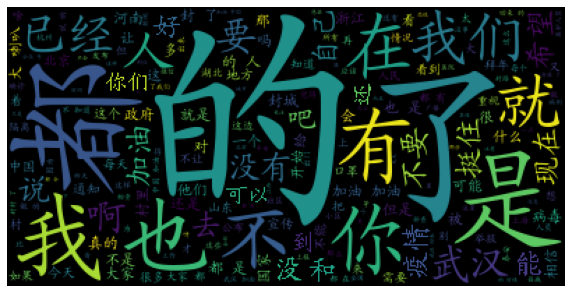

In [14]:
# 积极
wc = WordCloud(font_path='KaiTi_GB2312.ttf')
wc.generate(''.join(data_cutted['Comment'][data_cutted['Class'] == 1]))
fig = plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(wc)
plt.show()

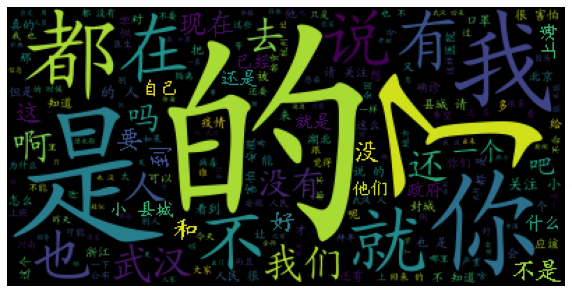

In [15]:
# 消极评论

wc = WordCloud(font_path='KaiTi_GB2312.ttf')
wc.generate(''.join(data_cutted['Comment'][data_cutted['Class'] == -1]))
fig = plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(wc)
plt.show()

In [16]:
# 读入停用词文件
import codecs

with codecs.open('stopwords.txt', 'r', encoding='utf-8') as f:
    stopwords = [item.strip() for item in f]
    
for item in stopwords[0:200]:
    print(item,end="")

﻿-庶几moreoverwhereby总的来说哟呗嗯front具体地说aslant咋既是由于hadunlike不成起见难道说if反过来每当始而evenuntowe这个自从从此极了one离they贼死﹋云云below吧对于对比只消往或者焉许多hundred这样hashereupon为了所以何时随后呵呵no并且being比方whose正巧省得若夫﹨依照thereby哼而况billseriousmaybe大）againstltd俺们third不怕afore其之把而如上﹁yours些›︰nowaccording】elsewherenighhereby﹑so由此可见使veryouritself她们而已自己ourselves即令用来如何¯换言之ten一样既然设使这会儿那些aroundconnorthereuponthroughout反之your待乎egeverymajoroncedown呼哧来¡herself那么样towards如若过﹞咳nobody2除非top不问任何以至于therein只怕sometimesam光是呵和今欤咧many再则某咚要不然唯有综上所述若非aloneerenameshould且不说及至0的话insidehowbeen等等其二}forty该所幸becauseleast接着每othersame如下nevertheless咱却漫说吱whats假如dr此次

In [17]:
#设定停用词文件,在统计关键词的时候，过滤停用词
import jieba.analyse

jieba.analyse.set_stop_words('stopwords.txt')

In [18]:
# 正向评论关键词
keywords_pos = jieba.analyse.extract_tags(''.join(data_cutted['Comment'][data_cutted['Class'] == 1]), topK=20)
for item in keywords_pos:
    print(item,end=' ')

加油 武汉 挺住 封城 封村 疫情 希望 喇叭 口罩 已经 不要 封路 病毒 相信 隔离 微博 河南 现在 浙江 中国 

In [19]:
#负向评论关键词
keywords_neg = jieba.analyse.extract_tags(''.join(data_cutted['Comment'][data_cutted['Class'] == -1]), topK=20)

for item in keywords_neg:
    print (item,end=' ')

武汉 封城 口罩 安徽 确诊 没有 县城 知道 现在 上海 浙江 什么 害怕 宣传 空投 疫情 感染 真的 人民 关注 

In [20]:
# 实现向量化方法
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#实现svm和贝叶斯模型
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier


# 实现交叉验证
#from sklearn.cross_validation import train_test_split
#from sklearn.cross_validation import cross_val_score
#cross_validatio这个包早就不在使用了，划分到了model_selection这个包中
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# 实现评价指标
from sklearn import metrics

In [21]:
# 文本情感分类的类：CommentClassifier
class CommentClassifier:
    def __init__(self, classifier_type, vector_type):
        self.classifier_type = classifier_type #分类器类型：支持向量机或贝叶斯分类
        self.vector_type = vector_type         #文本向量化模型：0\1模型,TF模型,TF-IDF模型

    def fit(self, train_x, train_y, max_df):
        list_text = list(train_x)
        
        #向量化方法：0 - 0/1,1 - TF,2 - TF-IDF
        #max_df可以设置为范围在[0.0 1.0]的float，也可以设置为没有范围限制的int，默认为1.0。这个参数的作用是作为一个阈值，当构造语料库的关键词集的时候，如果某个词的document frequence大于max_df，这个词不会被当作关键词。如果这个参数是float，则表示词出现的次数与语料库文档数的百分比，如果是int，则表示词出现的次数。如果参数中已经给定了vocabulary，则这个参数无效
        if self.vector_type == 0:
            self.vectorizer = CountVectorizer(max_df, stop_words = stopwords, ngram_range=(1, 3)).fit(list_text)
        elif self.vector_type == 1:
            self.vectorizer = TfidfVectorizer(max_df, stop_words = stopwords, ngram_range=(1, 3), use_idf=False).fit(list_text)
        else:
            self.vectorizer = TfidfVectorizer(max_df, stop_words = stopwords, ngram_range=(1, 3)).fit(list_text)

        self.array_trainx = self.vectorizer.transform(list_text)
        self.array_trainy = train_y

        #分类模型选择：1 - SVC,2 - LinearSVC,3 - SGDClassifier，三种SVM模型  
        if self.classifier_type == 1:
            self.model = SVC(kernel='linear', gamma=10 ** -5, C=1).fit(self.array_trainx, self.array_trainy)
        elif self.classifier_type == 2:
            self.model = LinearSVC().fit(self.array_trainx, self.array_trainy)
        else:
            self.model = SGDClassifier().fit(self.array_trainx, self.array_trainy)
        
    def predict_value(self, test_x):
        list_text = list(test_x)
        self.array_testx = self.vectorizer.transform(list_text)
        array_predict = self.model.predict(self.array_testx)
        return array_predict

    def predict_proba(self, test_x):
        list_text = list(test_x)
        self.array_testx = self.vectorizer.transform(list_text)
        array_score = self.model.predict_proba(self.array_testx)
        return array_score 

In [23]:
#划分训练集，测试集
train_x, test_x, train_y, test_y = train_test_split(data_cutted['Comment'].ravel().astype('U'), data_cutted['Class'].ravel(),
                                                        test_size=0.2, random_state=4)

classifier_list = [1,2,3]
vector_list = [0,1,2]

for classifier_type in classifier_list:
    for vector_type in vector_list:
        commentCls = CommentClassifier(classifier_type, vector_type)
        #max_df 设置为0.98
        commentCls.fit(train_x, train_y, 0.98)
        if classifier_type == 0:
            value_result = commentCls.predict_value(test_x)
            proba_result = commentCls.predict_proba(test_x)
            print(classifier_type,vector_type)
            print('classification report')
            print(metrics.classification_report(test_y, value_result, labels=[-1,  1]))
            print('confusion matrix')
            print(metrics.confusion_matrix(test_y, value_result, labels=[-1, 1]))
        else:
            value_result = commentCls.predict_value(test_x)
            print(classifier_type,vector_type)
            print('classification report')
            print(metrics.classification_report(test_y, value_result, labels=[-1, 1]))
            print('confusion matrix')
            print(metrics.confusion_matrix(test_y, value_result, labels=[-1, 1]))

d:\Users\ZXF\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass input=0.98 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
d:\Users\ZXF\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['nbsp', 'vip'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


1 0
classification report
              precision    recall  f1-score   support

          -1       0.81      0.88      0.84       679
           1       0.64      0.51      0.57       289

    accuracy                           0.77       968
   macro avg       0.73      0.69      0.71       968
weighted avg       0.76      0.77      0.76       968

confusion matrix
[[598  81]
 [142 147]]


d:\Users\ZXF\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass input=0.98 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
d:\Users\ZXF\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['nbsp', 'vip'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


1 1
classification report
              precision    recall  f1-score   support

          -1       0.81      0.92      0.86       679
           1       0.73      0.49      0.59       289

    accuracy                           0.79       968
   macro avg       0.77      0.71      0.73       968
weighted avg       0.79      0.79      0.78       968

confusion matrix
[[626  53]
 [146 143]]


d:\Users\ZXF\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass input=0.98 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
d:\Users\ZXF\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['nbsp', 'vip'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


1 2
classification report
              precision    recall  f1-score   support

          -1       0.81      0.93      0.87       679
           1       0.75      0.50      0.60       289

    accuracy                           0.80       968
   macro avg       0.78      0.72      0.73       968
weighted avg       0.80      0.80      0.79       968

confusion matrix
[[631  48]
 [144 145]]


d:\Users\ZXF\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass input=0.98 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
d:\Users\ZXF\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['nbsp', 'vip'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
d:\Users\ZXF\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
d:\Users\ZXF\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass input=0.98 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments wi

2 0
classification report
              precision    recall  f1-score   support

          -1       0.81      0.86      0.83       679
           1       0.61      0.54      0.57       289

    accuracy                           0.76       968
   macro avg       0.71      0.70      0.70       968
weighted avg       0.75      0.76      0.76       968

confusion matrix
[[581  98]
 [133 156]]
2 1
classification report
              precision    recall  f1-score   support

          -1       0.81      0.90      0.85       679
           1       0.68      0.49      0.57       289

    accuracy                           0.78       968
   macro avg       0.74      0.70      0.71       968
weighted avg       0.77      0.78      0.77       968

confusion matrix
[[611  68]
 [146 143]]


d:\Users\ZXF\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass input=0.98 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
d:\Users\ZXF\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['nbsp', 'vip'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


2 2
classification report
              precision    recall  f1-score   support

          -1       0.81      0.90      0.85       679
           1       0.68      0.49      0.57       289

    accuracy                           0.78       968
   macro avg       0.74      0.70      0.71       968
weighted avg       0.77      0.78      0.77       968

confusion matrix
[[611  68]
 [146 143]]


d:\Users\ZXF\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass input=0.98 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
d:\Users\ZXF\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['nbsp', 'vip'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


3 0
classification report
              precision    recall  f1-score   support

          -1       0.81      0.87      0.84       679
           1       0.63      0.52      0.57       289

    accuracy                           0.77       968
   macro avg       0.72      0.70      0.71       968
weighted avg       0.76      0.77      0.76       968

confusion matrix
[[591  88]
 [138 151]]


d:\Users\ZXF\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass input=0.98 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
d:\Users\ZXF\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['nbsp', 'vip'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


3 1
classification report
              precision    recall  f1-score   support

          -1       0.81      0.86      0.84       679
           1       0.63      0.53      0.58       289

    accuracy                           0.77       968
   macro avg       0.72      0.70      0.71       968
weighted avg       0.76      0.77      0.76       968

confusion matrix
[[587  92]
 [135 154]]


d:\Users\ZXF\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass input=0.98 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
d:\Users\ZXF\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['nbsp', 'vip'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


3 2
classification report
              precision    recall  f1-score   support

          -1       0.82      0.87      0.84       679
           1       0.64      0.54      0.58       289

    accuracy                           0.77       968
   macro avg       0.73      0.70      0.71       968
weighted avg       0.76      0.77      0.77       968

confusion matrix
[[593  86]
 [134 155]]
